<a href="https://colab.research.google.com/github/malavikaparth/Machine_learning/blob/main/the_species_of_iris_A_classification_problem(K_nearest_neighbors).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We want to build a machine learning model from this data that can predict the species of iris for a new set of measurements.

In [22]:
pip install mglearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 8.1 MB/s eta 0:00:00


In [1]:
#Every iris in the dataset belongs to one of three classes, so this problem is a three-class classification problem.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#importing Iris dataset from sikit learn
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris_dataset['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
print("The required target names:{}".format(iris_dataset['target_names']))

The required target names:['setosa' 'versicolor' 'virginica']


The target names shows that there are three classes to be classified and that this is a multiclass classification

In [7]:
#Let us see what each feature is
print("The required data:{}".format(iris_dataset['data']))
print("The required target:{}".format(iris_dataset['target']))
print("The required frame:{}".format(iris_dataset['frame']))
print("The required target names:{}".format(iris_dataset['target_names']))
print("The required DESCR:{}".format(iris_dataset['DESCR']))
print("The required feature_names:{}".format(iris_dataset['feature_names']))
print("The required filename:{}".format(iris_dataset['filename']))
print("The required data_module:{}".format(iris_dataset['data_module']))

The required data:[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5

In [8]:
#To know the type of data
print("Type of data: {}".format(type(iris_dataset['data'])))


Type of data: <class 'numpy.ndarray'>


In [9]:
print("Shape of data: {}".format(iris_dataset['data'].shape))
#This meas there is 150 rows and 4 features for each data
#We see that the array contains measurements for 150 different flowers

Shape of data: (150, 4)


In [10]:
#First 5 colums of the dataset
print("First five columns of data:\n{}".format(iris_dataset['data'][:5]))
#feature_names:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

First five columns of data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
#To find what is the tyoe of the target array
print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [12]:
print("Shape of target: {}".format(iris_dataset['target'].shape))


Shape of target: (150,)


In [13]:
print("Target:\n{}".format(iris_dataset['target']))

Target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [14]:
print("Shape of data: {}".format(iris_dataset['target'].shape))

Shape of data: (150,)


In [15]:
print("Target:\n{}".format(iris_dataset['target_names'])) #0 means setosa, 1 means versicolor, and 2 means virginica

Target:
['setosa' 'versicolor' 'virginica']


In [16]:
#Before making the split, the train_test_split function shuffles the dataset using a pseudorandom number generator.
#To make sure that we will get the same output if we run the same function several times, we provide the pseudorandom number generator with a fixed seed using the random_state parameter.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 iris_dataset['data'], iris_dataset['target'], random_state=0)


In [17]:
#The output of the train_test_split function is X_train, X_test, y_train, and y_test, which are all NumPy arrays. X_train contains 75% of the rows of the dataset,
#and X_test contains the remaining 25%:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [18]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))


X_test shape: (38, 4)
y_test shape: (38,)


First Things First: Look at Your Data
Before building a machine learning model it is often a good idea to inspect the data.
Additionally, inspecting your data is a good way to find abnormalities and peculiarities. Maybe some of your irises were measured using inches and not centimeters, for example. In the real world, inconsistencies in the data and unexpected measurements are very common

### Scatter plot

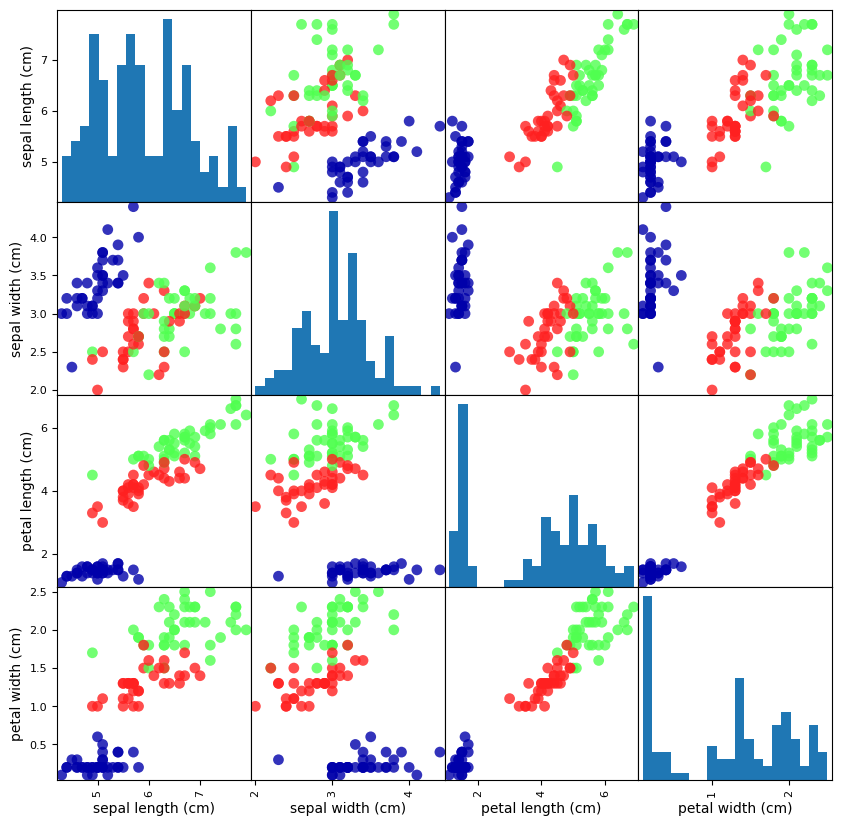

In [27]:
import mglearn
# create dataframe from data in X_train
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = pd.DataFrame(X_train,columns=iris_dataset.feature_names)
# create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(10, 10), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)



In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [41]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=2, p=2,
 weights='uniform')


KNeighborsClassifier(n_jobs=1, n_neighbors=2)

In [58]:
y_pred = knn.predict(X_train)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]


In [59]:
print("Test set score: {:.2f}".format(np.mean(y_pred == y_train)))


Test set score: 1.00


In [35]:
print("Test set score: {:.2f}".format(knn.score(X_train, y_train)))

Test set score: 1.00


Testing the model

In [36]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [37]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97
